# 18-4 Plotting with sympy

We saw that matplotlib provides tools for graphics which can be used for scientific plotting. Sympy provide "higher-level" function, geared towards mathematical plotting.

## "basic" usage

In [1]:
from sympy import *
import numpy as np
%matplotlib widget

In [3]:
# A general Gaussian function:
(sigma, mu, x) = symbols( ('sigma', 'mu', 'x') )
gaussian = exp(-(x-mu)**2/sigma**2/2)/sigma/sqrt(2*pi)
gaussian

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

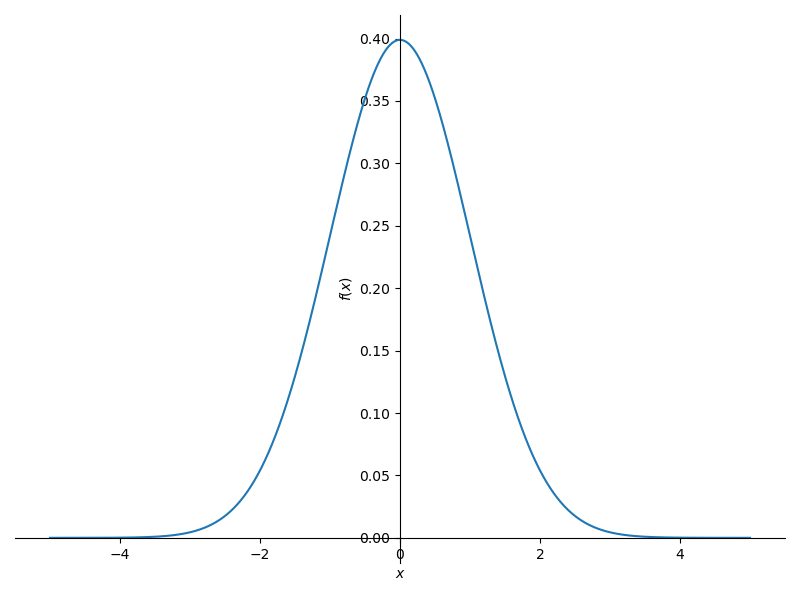

In [11]:
p = plot(gaussian.subs( {sigma:1, mu:0}))

Here, matplotlib did the low-level plotting (we'll see that we can change this), driven by sympy.
Note how sympy knows how to setup axes etc.

See the help page for plot for more options

In [10]:
help(plot)

Help on function plot in module sympy.plotting.plot:

plot(*args, show=True, **kwargs)
    Plots a function of a single variable as a curve.

    Parameters

    args :
        The first argument is the expression representing the function
        of single variable to be plotted.

        The last argument is a 3-tuple denoting the range of the free
        variable. e.g. ``(x, 0, 5)``

        Typical usage examples are in the following:

        - Plotting a single expression with a single range.
            ``plot(expr, range, **kwargs)``
        - Plotting a single expression with the default range (-10, 10).
            ``plot(expr, **kwargs)``
        - Plotting multiple expressions with a single range.
            ``plot(expr1, expr2, ..., range, **kwargs)``
        - Plotting multiple expressions with multiple ranges.
            ``plot((expr1, range1), (expr2, range2), ..., **kwargs)``

        It is best practice to specify range explicitly because default
        range may 

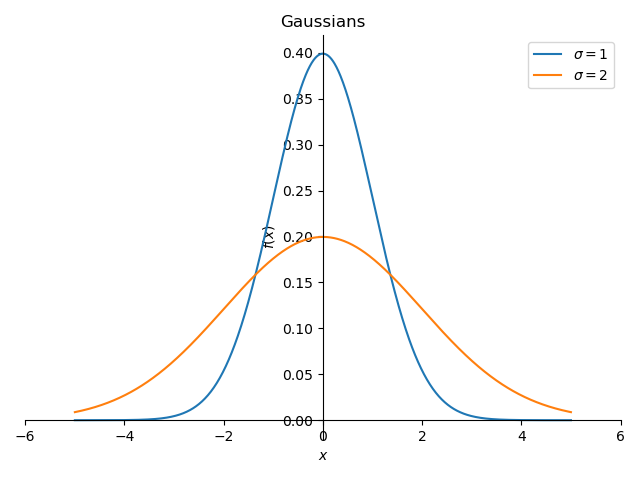

In [27]:
p = plot( (gaussian.subs( {'mu':0, 'sigma':1}), (x, -5,5), r'$\sigma = 1$'),
          (gaussian.subs( {'mu':0, 'sigma':2}), (x, -5,5), r'$\sigma = 2$'),
          title = "Gaussians",
          xlim = (-6,6),
          legend = True)

We can make changes to the figure, but we will have to replot it for the changes to show:

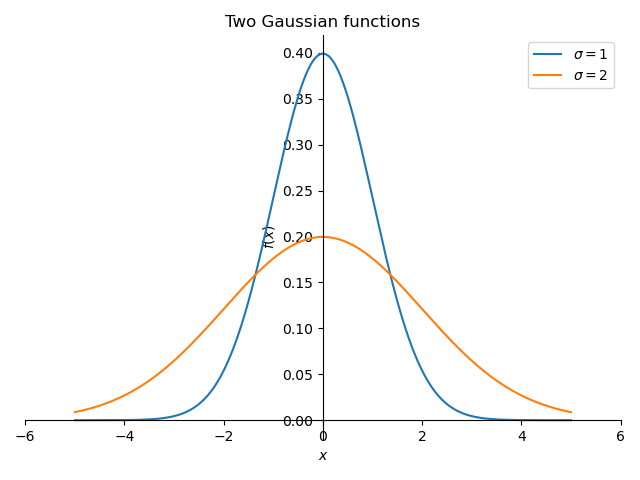

In [28]:
p.title = "Two Gaussian functions"
p.show()

`p` is a complex object, essentially equivalent to a collection of plots so that `p[0]` and `p[1]` are respectively the first and second plot and can be modified separately:

In [33]:
p[:]

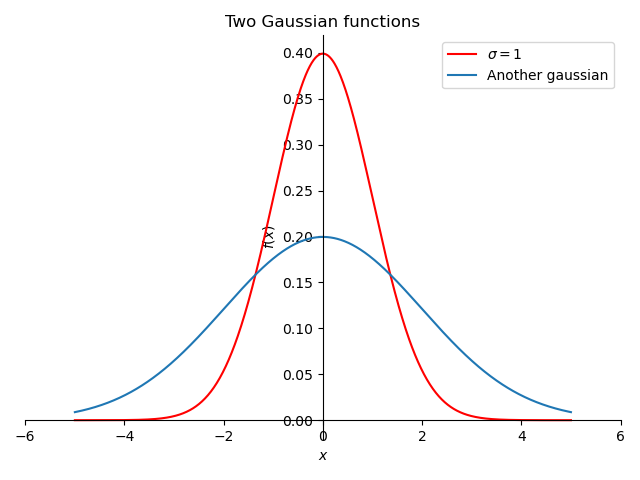

In [36]:
p[0].line_color = 'red'
p[1].label = r'Another gaussian'
p.show()

We can also defer the actual plotting so that we can make all changes before rendering:


In [38]:
p2 = plot( (gaussian.subs( {'mu':0, 'sigma':1})),
          (gaussian.subs( {'mu':0, 'sigma':2})), show = False)

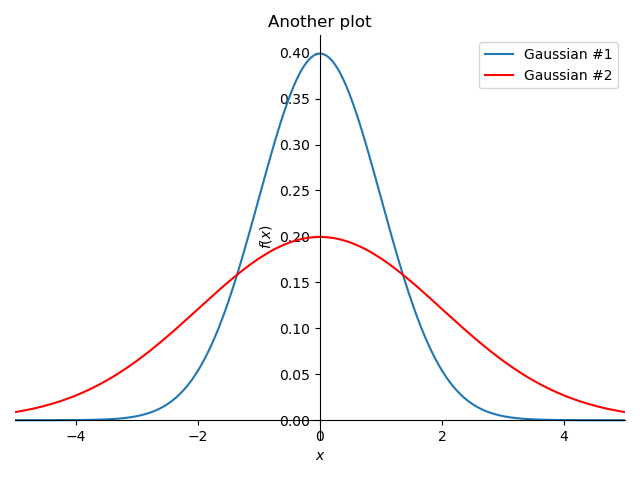

In [44]:
p2.title = 'Another plot'
p2.legend = True
p2.xlim = (-5,5)
p2[0].label = 'Gaussian #1'
p2[1].label = 'Gaussian #2'
p2[1].line_color = 'red'

p2.show()

We can also add to an existing plot:

u, v = symbols("u, v")
r = 2 + sin(7 * u + 5 * v)
expr = (
    r * cos(u) * sin(v),
    r * sin(u) * sin(v),
    r * cos(v)
)
plot3d_parametric_surface(*expr, (u, 0, 2 * pi), (v, 0, pi), "expr",
    backend=KB, use_cm=True)

Since p2 is a collection of plots, we can add to it:

Since `p2` is a collection of plots, we can add to it:

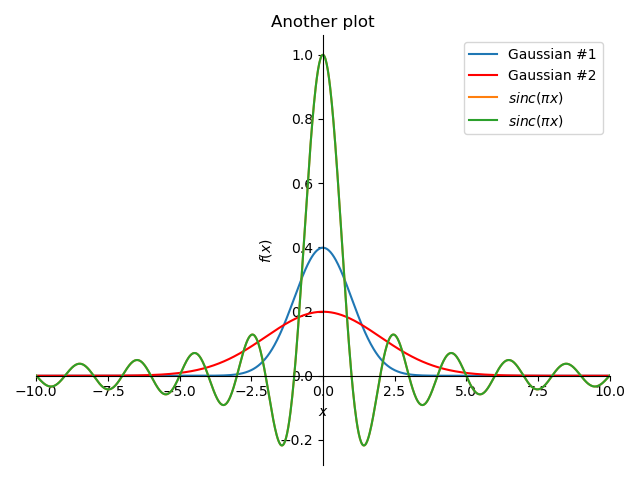

In [46]:
p3 = plot(sinc(pi*x), (x, -10,10), label = r'$sinc(\pi x)$', show = False)
p2.append(p3[0])
p2.xlim = (-10,10)
p2.show()

### 2D parametric functions

`plot_parametric` plots parametric functions.

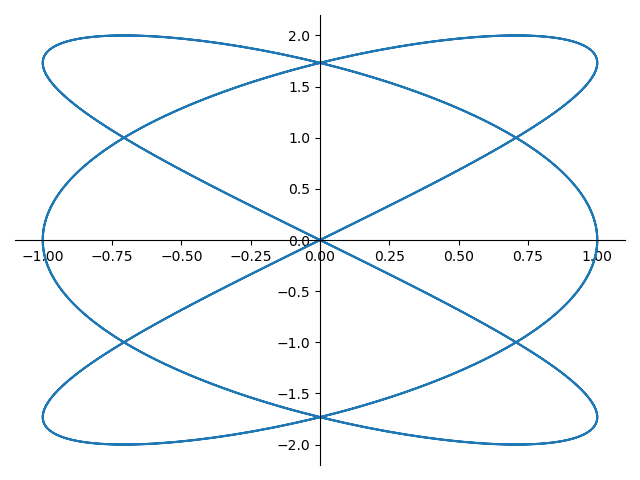

In [49]:
t = Symbol('t')
lissajou = plot_parametric( sin(3*t), 2*sin(2*t), (t, -2*pi, 2*pi))

### 2D Implicit plots

`plot_implicit` will plot curves or regions of the plane defined implicitely

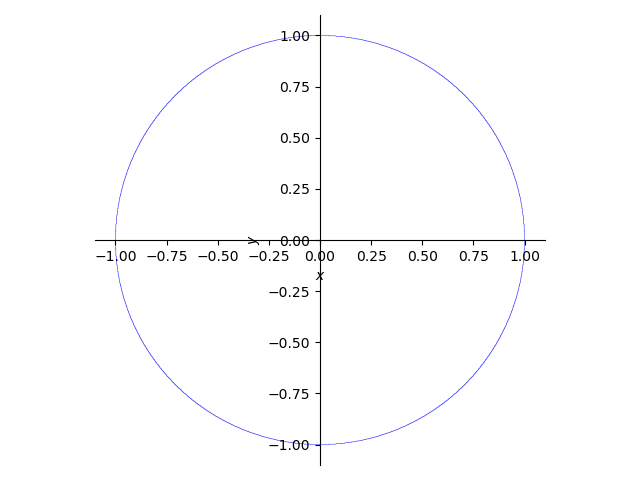

In [101]:
imp = plot_implicit(Eq(x**2 + y**2, 1), (x,-1.1,1.1), (y, -1.1,1.1), aspect_ratio = (1,1))

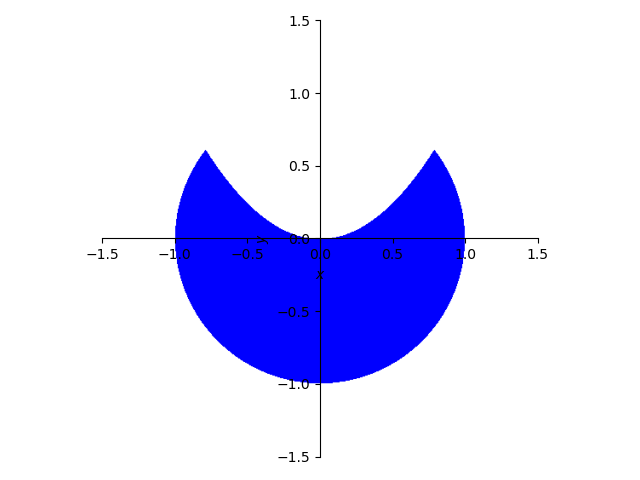

In [102]:
# plot the region between the curves y = x**2 and $y = sqrt(x)
plot_implicit(And(x**2+y**2 < 1, y<x**2), (x, -1.5, 1.5), (y, -1.5, 1.5), aspect_ratio = (1,1))

## Basic 3d plots
sympy can use matplotlib for basic 3D plotting, but is is rather slow. 
3d plots are parts of `sympy.plotting.plot` and must be imported explicitly 

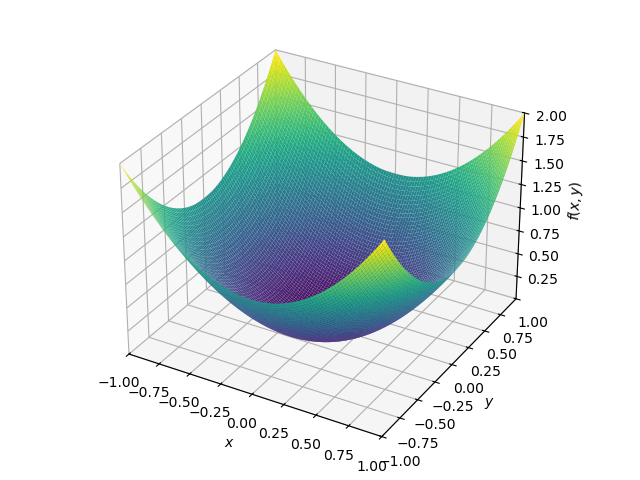

In [107]:
from sympy.plotting.plot import plot3d, plot3d_parametric_line
p3d = plot3d( x**2+y**2, (x, -1,1), (y, -1,1))

In [ ]:
## Advanced 

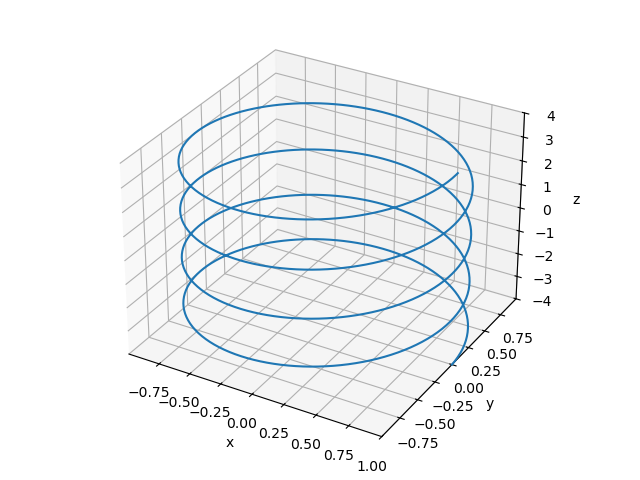

In [116]:
l3d = plot3d_parametric_line(cos(t), sin(t), t/pi, (t, -4*pi, 4*pi))

plot_contour(x**2+y**2, (-1,1), (-1,1))

## plotting backends

## Plotting backends

## Plotting backends
Instead of matplotlib, sympy can use various libraries to render plots through the Sympy Plotting Backends module. This is particularly useful as matplotlib is very slow in 3D.

### Installation
cf. https://sympy-plot-backends.readthedocs.io/en/latest/install.html

In syzygy, open a terminal window and type the following command (it may take a few minutes to run):

`pip install sympy_plot_backends[all]`

Then go back to your notebook, and restart the kernel (the circular arrow icon)